In [1]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

2022-11-14 19:34:10.886141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 19:34:10.997368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 19:34:10.997393: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 19:34:11.021308: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 19:34:11.500029: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [3]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_type"
for model_layers in [[
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]]:
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
all_titles.append("no dropout")
all_titles.append("dropout")
all_descriptions

2022-11-14 19:34:12.224871: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-14 19:34:12.224901: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-14 19:34:12.224916: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-11-14 19:34:12.225074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (2, 2)  (1, 1),
 0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (2, 2)  (1, 1)
 5             None    None        None       None      None    None]

In [4]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [5]:
batch_size = 128
epochs = 10
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    all_history.append(history)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/10
422/422 [==============================] - 56s 132ms/step - loss: 0.1432 - accuracy: 0.9573 - val_loss: 0.0548 - val_accuracy: 0.9867
Epoch 2/10
422/422 [==============================] - 53s 127ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 3/10
422/422 [==============================] - 53s 125ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0389 - val_accuracy: 0.9902
Epoch 4/10
422/422 [==============================] - 52s 123ms/step - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0492 - val_accuracy: 0.9873
Epoch 5/10
422/422 [==============================] - 53s 126ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0414 - val_accuracy: 0.9910
Epoch 6/10
422/422 [==============================] - 51s 122ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0387 - val_accuracy: 0.9908
Epoch 7/10
422/422 [==============================] - 50s 119ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0394 - val_ac

 50%|█████     | 1/2 [08:24<08:24, 504.45s/it]

Epoch 1/10
422/422 [==============================] - 51s 119ms/step - loss: 0.1543 - accuracy: 0.9534 - val_loss: 0.0510 - val_accuracy: 0.9860
Epoch 2/10
422/422 [==============================] - 54s 128ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 3/10
422/422 [==============================] - 52s 123ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 4/10
422/422 [==============================] - 52s 122ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0366 - val_accuracy: 0.9903
Epoch 5/10
422/422 [==============================] - 50s 119ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0377 - val_accuracy: 0.9908
Epoch 6/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0353 - val_accuracy: 0.9917
Epoch 7/10
422/422 [==============================] - 47s 112ms/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0353 - val_ac

100%|██████████| 2/2 [16:39<00:00, 499.84s/it]


In [6]:
# score = model.evaluate(x_test, y_test, verbose=0)

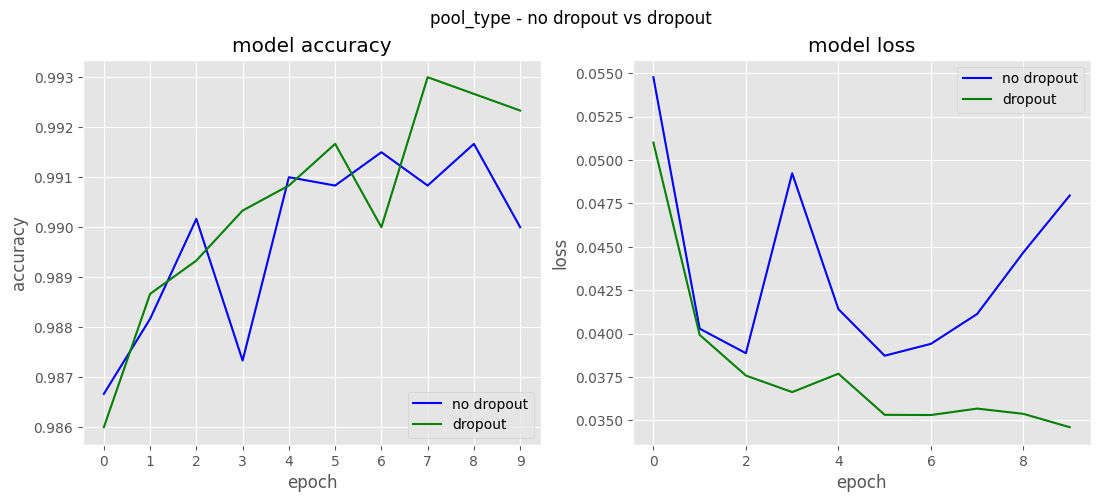

In [7]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)